In [1]:
### Compute - What are the top 10 Zipcodes for 911 and 
### Question 1: Are Zipcodes 19446 and 19090 presents?

In [2]:
## Option #1 -> Dictionary
import pandas as pd

for filename in ['/Users/vels/Desktop/MyPy/00_Assignment/Datasets/911.csv']:
    file = pd.read_csv(filename)
    all_loc = dict(file['zip'].value_counts()).keys()
    most_loc = list(all_loc)[:10]

print(most_loc)

[19401.0, 19464.0, 19403.0, 19446.0, 19406.0, 19002.0, 19468.0, 19046.0, 19454.0, 19090.0]


In [3]:
## Option #2 -> Pandas
import pandas as pd

df1 = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/911.csv')
df = df1.drop('e',axis=1)
Zip = df.zip
# zip.value_counts().head(10) 
Zip.value_counts().nlargest(10)

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64

In [4]:
### Compute - What are the top 4 townships (twp) for 911 calls and 
### Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

twp = df.twp
twp.value_counts().nlargest(4)

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64

In [5]:
### Compute - Create new features and 
### Question 3: What is the most common reason for 911 calls based on the Reason Column? Which comes second

title = df.title
title.value_counts().nlargest(5)

Traffic: VEHICLE ACCIDENT -    62218
Traffic: DISABLED VEHICLE -    18923
Fire: FIRE ALARM               15091
EMS: RESPIRATORY EMERGENCY     13503
EMS: CARDIAC EMERGENCY         13420
Name: title, dtype: int64

In [6]:
df.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [7]:
# Separating the Department from the 'Department:Reason' in the 'Title' column

df['department'] = df.title.apply(lambda title:title.split(':')[0])
df.head()


# Method: 2
# department = df.title.str.split(':', expand=True)[0]
# df['department'] = department
# df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [8]:
# Separating the Reason from the 'Department:Reason' in the 'Title' column

df['reason'] = df.title.apply(lambda title:title.split(':')[1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,department,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [9]:
reason = df.reason
reason.value_counts().nlargest(5)

 VEHICLE ACCIDENT -       62218
 DISABLED VEHICLE -       18923
 VEHICLE ACCIDENT         15411
 FIRE ALARM               15143
 RESPIRATORY EMERGENCY    13504
Name: reason, dtype: int64

In [10]:
# Finding the Departments for 911 calls

print("The Departments that were called for 911 calls are:\n" , df.department.value_counts())
print("\n The total number of Departments are:\n" , df.department.nunique())

The Departments that were called for 911 calls are:
 EMS        133234
Traffic     93400
Fire        39909
Name: department, dtype: int64

 The total number of Departments are:
 3


### Compute - Plot barchart using matplot for 911 calls by Reason and Question 4: How can you plot the bars horizontally?

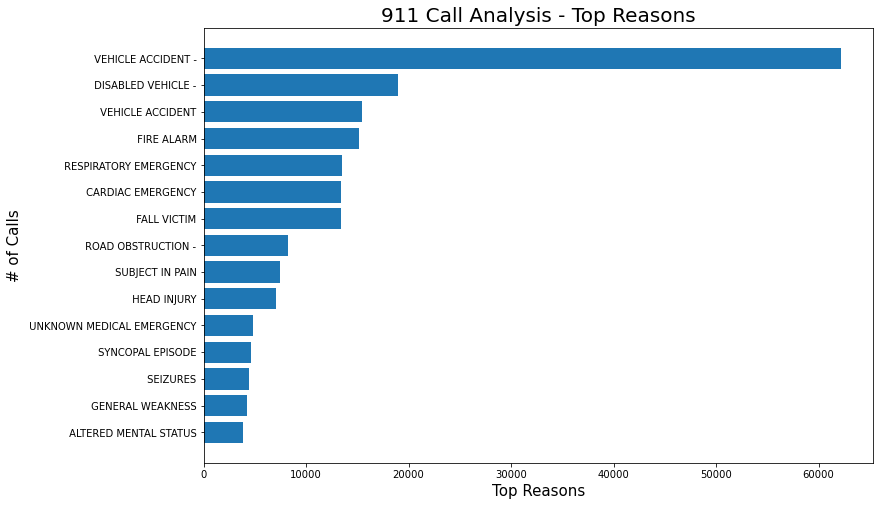

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df_reason = df.reason.value_counts()[:15]
x = list(df_reason.index)
y = list(df_reason.values)
#Reversing to show the top reason as first
x.reverse()
y.reverse()

plt.figure(figsize=(12, 8))
plt.barh(x,y)
# Change the font size and lable to show veritical

plt.xlabel("Top Reasons", fontsize=15)
plt.ylabel("# of Calls", fontsize =15)
plt.title("911 Call Analysis - Top Reasons", fontsize = 20)
plt.show();

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,department,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


In [13]:
### Do data manipulation and Question 5: Which day got maximum calls for EMS and How many?
# Using Pandas method to separate 'Day'
df['timeStamp'] = pd.to_datetime(df.timeStamp)


In [14]:
df['day'] = df.timeStamp.dt.day_name()
df['month'] = df.timeStamp.dt.month_name()

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,department,reason,day,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday,December
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,Thursday,December


In [15]:
df.day.value_counts()

## Based upon the results, Friday and Tuesday are the top 2 days most of 911 calls origin

Friday       40706
Tuesday      40288
Wednesday    40217
Thursday     39677
Monday       39003
Saturday     35217
Sunday       31435
Name: day, dtype: int64

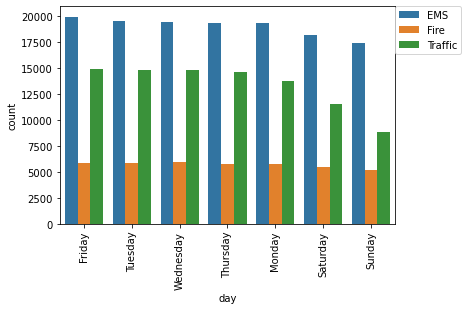

In [16]:
### Compute - Create a countplot of the Day of Week column with the hue based on the
### Reason column and Question 6: On which day traffic calls were lowest?
import seaborn as sns

df['count'] = df.groupby('day')['department'].transform('count')

df.sort_values(by='count',ascending=False,inplace=True)

# count plot on single categorical variable
sns.countplot(x = 'day',hue ='department', data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [17]:
print(f'The day which received the least number of calls is {df.day.value_counts().index[-1]} \
and the number of calls is {df.day.value_counts()[-1]}.')

The day which received the least number of calls is Sunday and the number of calls is 31435.


In [18]:
### Compute - Create a countplot month-wise -- Question 7: Which month saw the highest calls for fire?
df1 = df[df['department'] == "Fire"]
df1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,department,reason,day,month,count
204912,40.096035,-75.400041,AMERICAN AVE & 1ST AVE; UPPER MERION; 2017-05-...,19406.0,Fire: FIRE ALARM,2017-05-26 23:44:04,UPPER MERION,AMERICAN AVE & 1ST AVE,Fire,FIRE ALARM,Friday,May,40706
67387,40.253002,-75.682496,RT422 BYP & RAMP RT422 EB TO S GROSSTOWN RD; W...,19464.0,Fire: FIRE SPECIAL SERVICE,2016-06-03 23:06:40,WEST POTTSGROVE,RT422 BYP & RAMP RT422 EB TO S GROSSTOWN RD,Fire,FIRE SPECIAL SERVICE,Friday,June,40706
67391,40.088355,-75.382100,DEKALB PIKE & ALLENDALE RD; UPPER MERION; 2016...,19406.0,Fire: FIRE ALARM,2016-06-03 23:21:30,UPPER MERION,DEKALB PIKE & ALLENDALE RD,Fire,FIRE ALARM,Friday,June,40706
204899,40.188032,-75.114680,BENDER RD & PEPPER WAY; HORSHAM; 2017-05-26 @ ...,19040.0,Fire: UNKNOWN TYPE FIRE,2017-05-26 22:20:52,HORSHAM,BENDER RD & PEPPER WAY,Fire,UNKNOWN TYPE FIRE,Friday,May,40706
67382,39.985493,-75.278545,DRAYTON LN & TRENT RD; LOWER MERION; 2016-06-0...,19096.0,Fire: FIRE ALARM,2016-06-03 22:44:33,LOWER MERION,DRAYTON LN & TRENT RD,Fire,FIRE ALARM,Friday,June,40706


In [19]:
df1.month.value_counts()

June         3773
August       3769
October      3668
July         3652
January      3562
September    3489
April        3331
February     3330
May          3243
March        3223
December     2941
November     1928
Name: month, dtype: int64

/var/folders/0p/yw5z5ccs6q58bgccdkh2rwt40000gn/T/ipykernel_21153/2706454430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count1'] = df1.groupby('month')['department'].transform('count')
/var/folders/0p/yw5z5ccs6q58bgccdkh2rwt40000gn/T/ipykernel_21153/2706454430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by='count1',ascending=False,inplace=True)


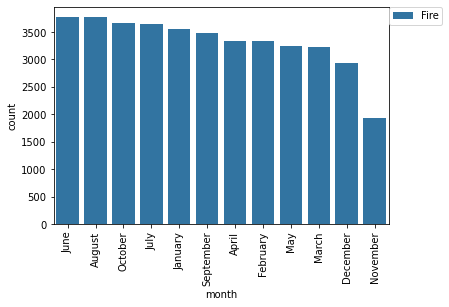

In [20]:
df1['count1'] = df1.groupby('month')['department'].transform('count')

df1.sort_values(by='count1',ascending=False,inplace=True)

### df_cal = df[ df['Calories'] >= 300 ]

# count plot on single categorical variable
sns.countplot(x = 'month',hue ='department', data = df1)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [21]:
print(f'The Month which received the highest number of FIRE calls is {df1.month.value_counts().index[0]} \
and the number of calls is {df1.month.value_counts()[0]}.')

The Month which received the highest number of FIRE calls is June and the number of calls is 3773.


In [29]:
### Compute - Create Web Map for Traffic Calls and Question 8: Why do some areas
### seem to have lower or almost zero traffic calls? Hint: Zoom the map

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins

call_data = pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/911.csv')

# Separating the Department from the 'Department:Reason' in the 'Title' column

call_data['department'] = call_data.title.apply(lambda title:title.split(':')[0])

# Creating a dataframe which is subset of 'data' having only 'Traffic' department

data_Traffic = call_data[call_data.department=='Traffic']
data_Traffic.head()
maps = data_Traffic[:500]

lon=list(maps["lng"])
lat=list(maps["lat"])
cat=list(maps["department"])

# Using folium
# other folium basemaps are OpenStreetMap,Stamen Terrain,Stamen Toner,Mapbox Bright,some mapquest,
# CartoDB Dark Matter
map_data=folium.Map(location=[40.2978759,-75.5812935],zoom_start=10, tiles = "OpenStreetMap")  
fg=folium.FeatureGroup(name="Traffic Calls in Montgomery County in Pennsylvania State of USA")

for lt, ln, cy in zip(lat, lon, cat):
    fg.add_child(folium.Marker(location=[lt, ln],popup=str(cy),icon=folium.Icon(color='purple')))

map_data.add_child(fg)